# CBU5201 mini-project submission

The mini-project has two separate components:


1.   **Basic component** [6 marks]: Using the genki4k dataset, build a machine learning pipeline that takes as an input an image and predicts 1) whether the person in the image is similing or not 2) estimate the 3D head pose labels in the image.
2.   **Advanced component** [10 marks]: Formulate your own machine learning problem and build a machine learning solution using the genki4k dataset (https://inc.ucsd.edu/mplab/398/). 

Your submission will consist of two Jupyter notebooks, one for the basic component and another one for advanced component. Please **name each notebook**:

* CBU5201_miniproject_basic.ipynb
* CBU5201_miniproject_advanced.ipynb

then **zip and submit them toghether**.

Each uploaded notebook should include: 

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** indicated below. Notebooks might not be run, please make sure that the output cells are saved.

How will we evaluate your submission?

*   Conciseness in your writing (10%).
*   Correctness in your methodology (30%).
*   Correctness in your analysis and conclusions (30%).
*   Completeness (10%).
*   Originality (10%).
*   Efforts to try something new (10%).

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. 

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**:  Yaoan Yang

**Student ID**:  210976881



# 2 Problem formulation

Develop a machine learning pipeline for facial analysis using the Genki4K dataset, with the following objectives:

**Smile Detection:**
- Input: Images from the Genki4K dataset.
- Output: Binary classification indicating whether the person in the image is smiling or not.

**3D Head Pose Estimation:**
- Input: Images from the Genki4K dataset.
- Output: Predict 3D head pose labels for image.

# 3 Machine Learning pipeline

## Smile Detection

**Pre-Processing**

Lcating folder for training set, test set, validation set:

In [8]:
import os, shutil

base_dir = 'D:\\desktop\\bupt\\ML\\Mini_Project\\dataset_basic\\Smile'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training smile pictures
train_smile_dir = os.path.join(train_dir, 'smile')

# Directory with our training nosmile pictures
train_nosmile_dir = os.path.join(train_dir, 'nosmile')

# Directory with our validation smile pictures
validation_smile_dir = os.path.join(validation_dir, 'smile')

# Directory with our validation nosmile pictures
validation_nosmile_dir = os.path.join(validation_dir, 'nosmile')

# Directory with our validation smile pictures
test_smile_dir = os.path.join(test_dir, 'smile')

# Directory with our validation nosmile pictures
test_nosmile_dir = os.path.join(test_dir, 'nosmile')


In [9]:
print('total training smile images:', len(os.listdir(train_smile_dir)))
print('total training nosmile images:', len(os.listdir(train_nosmile_dir)))
print('total validation smile images:', len(os.listdir(validation_smile_dir)))
print('total validation nosmile images:', len(os.listdir(validation_nosmile_dir)))
print('total test smile images:', len(os.listdir(test_smile_dir)))
print('total test nosmile images:', len(os.listdir(test_nosmile_dir)))

total training smile images: 1730
total training nosmile images: 1470
total validation smile images: 200
total validation nosmile images: 190
total test smile images: 232
total test nosmile images: 177


Loading the images in the set: 

In [10]:
import tensorflow.keras as keras
keras.__version__
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 3200 images belonging to 2 classes.
Found 390 images belonging to 2 classes.
Found 409 images belonging to 2 classes.


**Building Model**

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

**Compile and Training**

In [41]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=390//20)

Epoch 1/30


C:\ProgramData\Anaconda3\envs\tensorflow\Lib\site-packages\ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == "":


100/100 [==============================] - 27s 261ms/step - loss: 0.6848 - acc: 0.5555 - val_loss: 0.6871 - val_acc: 0.5553
Epoch 2/30
100/100 [==============================] - 27s 273ms/step - loss: 0.6737 - acc: 0.5770 - val_loss: 0.6869 - val_acc: 0.5263
Epoch 3/30
100/100 [==============================] - 37s 366ms/step - loss: 0.6561 - acc: 0.6320 - val_loss: 0.6626 - val_acc: 0.6105
Epoch 4/30
100/100 [==============================] - 29s 290ms/step - loss: 0.6422 - acc: 0.6255 - val_loss: 0.6598 - val_acc: 0.5947
Epoch 5/30
100/100 [==============================] - 35s 346ms/step - loss: 0.6262 - acc: 0.6520 - val_loss: 0.6362 - val_acc: 0.6421
Epoch 6/30
100/100 [==============================] - 39s 395ms/step - loss: 0.6026 - acc: 0.6785 - val_loss: 0.6400 - val_acc: 0.6316
Epoch 7/30
100/100 [==============================] - 33s 331ms/step - loss: 0.5681 - acc: 0.7175 - val_loss: 0.6349 - val_acc: 0.6447
Epoch 8/30
100/100 [==============================] - 34s 340ms/st

**Saving result**

In [52]:
model.save('D:\\desktop\\bupt\\ML\\Mini_Project\\basic_v1.h5')

**One Example Test**

In [12]:
import tensorflow.keras as keras
import numpy as np
model = keras.models.load_model('D:\\desktop\\bupt\\ML\\Mini_Project\\basic_v1.h5')
#smile case
img_path='D:\\desktop\\bupt\\ML\\Mini_Project\\dataset_basic\\Smile\\test\\smile\\file1931.jpg'
img = keras.utils.load_img(img_path, target_size=(150, 150))
img_tensor = keras.utils.img_to_array(img)/255.0
img_tensor = np.expand_dims(img_tensor, axis=0)
prediction =model.predict(img_tensor)  
print(prediction)
if prediction[0][0]>0.5:
    result='smile'
else:
    result='nosmile'
print(result)
#non-smile case
img_path='D:\\desktop\\bupt\\ML\\Mini_Project\\dataset_basic\\Smile\\test\\nosmile\\file3824.jpg'
img = keras.utils.load_img(img_path, target_size=(150, 150))
img_tensor = keras.utils.img_to_array(img)/255.0
img_tensor = np.expand_dims(img_tensor, axis=0)
prediction =model.predict(img_tensor)  
print(prediction)
if prediction[0][0]>0.5:
    result='smile'
else:
    result='no smile'
print(result)

1/1 [==============================] - 0s 90ms/step
[[0.9822432]]
smile
1/1 [==============================] - 0s 28ms/step
[[0.0582096]]
no smile


**Evaluation**

In [11]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = 'D:\\desktop\\bupt\\ML\\Mini_Project\\dataset_basic\\Smile\\test'
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

score = model.evaluate_generator(
  test_generator,
  steps=409//20,
  max_queue_size=10,
  workers=1,
  use_multiprocessing=False,
  verbose=0)
print("loss: %.6f - acc: %.6f" % (score[0], score[1]))

Found 409 images belonging to 2 classes.


C:\ProgramData\Anaconda3\envs\tensorflow\Lib\site-packages\ipykernel_launcher.py:17: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  app.launch_new_instance()


loss: 0.516660 - acc: 0.785000


## Head Pose Estimation

**Pre Processing**

**Building Model**

**Compile and Training**

**Test and Evaluation**

# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

# 5 Modelling

Describe the ML model(s) that you will build. Explain why you have chosen them.

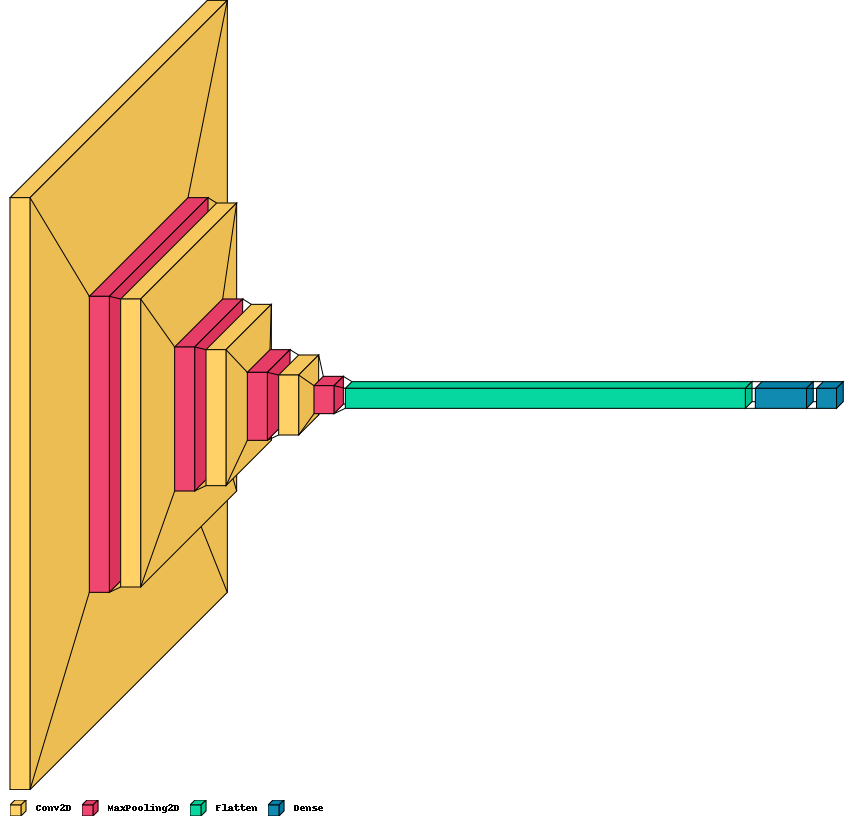

In [9]:
import visualkeras

visualkeras.layered_view(model, legend=True)

# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)

# 7 Dataset

Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.

# 8 Results

Carry out your experiments here, explain your results.

# 9 Conclusions

Your conclusions, improvements, etc should go here